### Series de tiempo

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Coeficiente de *Pearson*
  * Variables cuantitativas con distribución normal
  $$
   r = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i - \overline{x})^2\sum(y_i - \overline{y})^2}}
  $$
  *   $x_i$ es el valor de una variable, ej.edad
  *   $y_i$ es el valor de una variable, ej.salario
  *   $\overline{x},\overline{y}$ es la media de los valores de cada    variable
  *   $r$ es el coeficiente de *Pearson*

<div align="center">

| Rango         | Correlación |
|---------------|-------------|
| ±0.8 a ±1.0   | Muy buena   |
| ±0.6 a ±0.8   | Buena       |
| ±0.4 a ±0.6   | Moderada    |
| ±0.2 a ±0.4   | Escasa      |
| ±0.0 a ±0.2   | Nula        |

</div>

  #### Coeficiente de *Spearman*
  * variables cuantitativas que no tienen distribución normal
  * cuando se tienen valores atípicos (outliers)
  * variables ordinales
  $$
    \rho = 1 - \frac{6\sum d^2}{n^3 - n}
  $$
  *   $d$ diferencia de rangos entre las 2 variables
  *   $n$ número de casos


  <div align="center">

  | Valor rs | Fuerza de la correlación   |
  |----------|----------------------------|
  | 0.0 < 0.1| no hay correlación         |
  | 0.1 < 0.3| poca correlación           |
  | 0.3 < 0.5| correlación media          |
  | 0.5 < 0.7| correlación alta           |
  | 0.7 < 1  | correlación muy alta       |

  </div>


Para calcular $d$ se ordenan ambas variables de forma ascendente, anotando el índice que ocupa cada valor ordenado, finalmente $d$ es la diferencia de dichos índices en el orden original.
Un ejemplo sencillo del cálculo de $d$:

Como se puede observar en el siguiente ejemplo, para las columnas *y_ordenada* y *x_ordenada* obtienen un indice empezando desde *1*

Ahora solo sustituimos los indices ordenados en las posciones que corresponden.


<div align="center">

| x    | y    | pos x | pos y |  d   | y ordenada | pos_y |   x_ordenada   | pos_x |
|------|------|---------|---------|------|------------|-------|-------|-------|
| 46.8 | 31.7 |    5    |    2    | 30.6 |      1     |   1   | 43.2  |   1   |
| 43.2 | 30.6 |    1    |    1    | 31.7 |      2     |   2   | 44.1  |   2   |
| 44.1 | 38.9 |    2    |    5    | 32.4 |      3     |   3   | 44.7  |   3   |
| 44.7 | 34.0 |    3    |    4    | 34.0 |      4     |   4   | 45.4  |   4   |
| 45.4 | 32.4 |    4    |    3    | 38.9 |      5     |   5   | 46.8  |   5   |


</div>

### **Tarea**:
- Escribir un código que obtenga los coeficientes de Pearson y de Spearman

In [4]:
def coeficiente_pearson(x, y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas de datos numéricos.

    Args:
    x (list o numpy.array): Lista o array de valores de la primera variable.
    y (list o numpy.array): Lista o array de valores de la segunda variable.

    Returns:
    float: Coeficiente de correlación de Pearson.
    """
    # Verifica que las listas tengan la misma longitud
    if len(x) != len(y):
        raise ValueError("Las listas deben tener la misma longitud.")
    # Calculo de las medias
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    # Numerador y denominador de la fórmula de Pearson
    numerador = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominador_x = sum((xi - mean_x) ** 2 for xi in x)
    denominador_y = sum((yi - mean_y) ** 2 for yi in y)
    denominador = (denominador_x * denominador_y) ** 0.5
    # Evitar división por cero
    if denominador == 0:
        raise ValueError("La varianza de una de las variables es cero, no se puede calcular la correlación.")
    return numerador / denominador


In [5]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 55]

r = coeficiente_pearson(x, y)
print("Coeficiente de Pearson:", r)

Coeficiente de Pearson: 1.0


In [6]:
def coeficiente_spearman(x, y):
    """
    Calcula el coeficiente de correlación de Spearman entre dos listas de datos numéricos u ordinales.

    Args:
    x (list o numpy.array): Lista o array de valores de la primera variable.
    y (list o numpy.array): Lista o array de valores de la segunda variable.

    Returns:
    float: Coeficiente de correlación de Spearman.
    """
    # Verificar que las listas tengan la misma longitud
    if len(x) != len(y):
        raise ValueError("Las listas deben tener la misma longitud.")
    # Convertir las listas en rangos
    n = len(x)
    rank_x = sorted(range(len(x)), key=lambda i: x[i])
    rank_y = sorted(range(len(y)), key=lambda i: y[i])
    # Crear listas de rangos
    rank_x = [sorted(rank_x).index(i) + 1 for i in range(n)]
    rank_y = [sorted(rank_y).index(i) + 1 for i in range(n)]
    # Calcular diferencias de rangos y la suma de sus cuadrados
    d_squared_sum = sum((rank_x[i] - rank_y[i]) ** 2 for i in range(n))
    # Calcular el coeficiente de Spearman
    rho = 1 - (6 * d_squared_sum) / (n ** 3 - n)
    return rho

In [7]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 55]

rho = coeficiente_spearman(x, y)
print("Coeficiente de Spearman:", rho)

Coeficiente de Spearman: 1.0


#### Correlacion

In [8]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


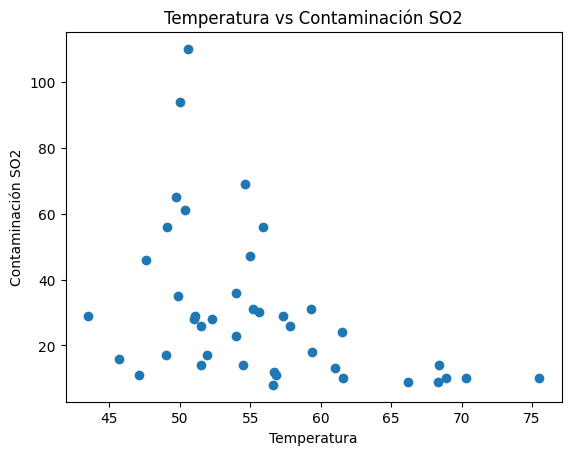

In [9]:
plt.scatter(cont['Temperatura'], cont['Contaminacion_SO2'])
plt.title('Temperatura vs Contaminación SO2')
plt.xlabel('Temperatura')
plt.ylabel('Contaminación SO2')
plt.show()

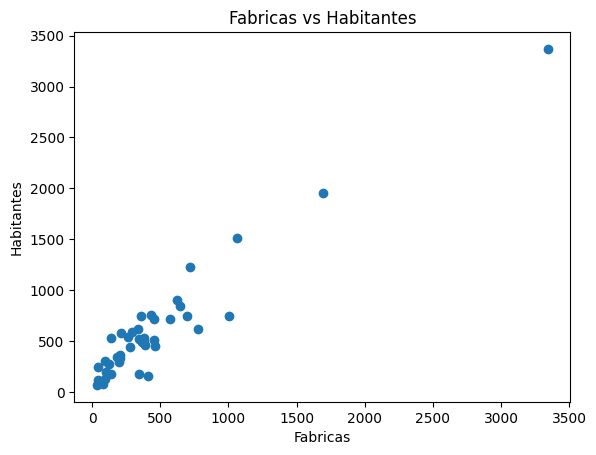

In [10]:
plt.scatter(cont['Fabricas'], cont['Habitantes'])
plt.title('Fabricas vs Habitantes')
plt.xlabel('Fabricas')
plt.ylabel('Habitantes')
plt.show()

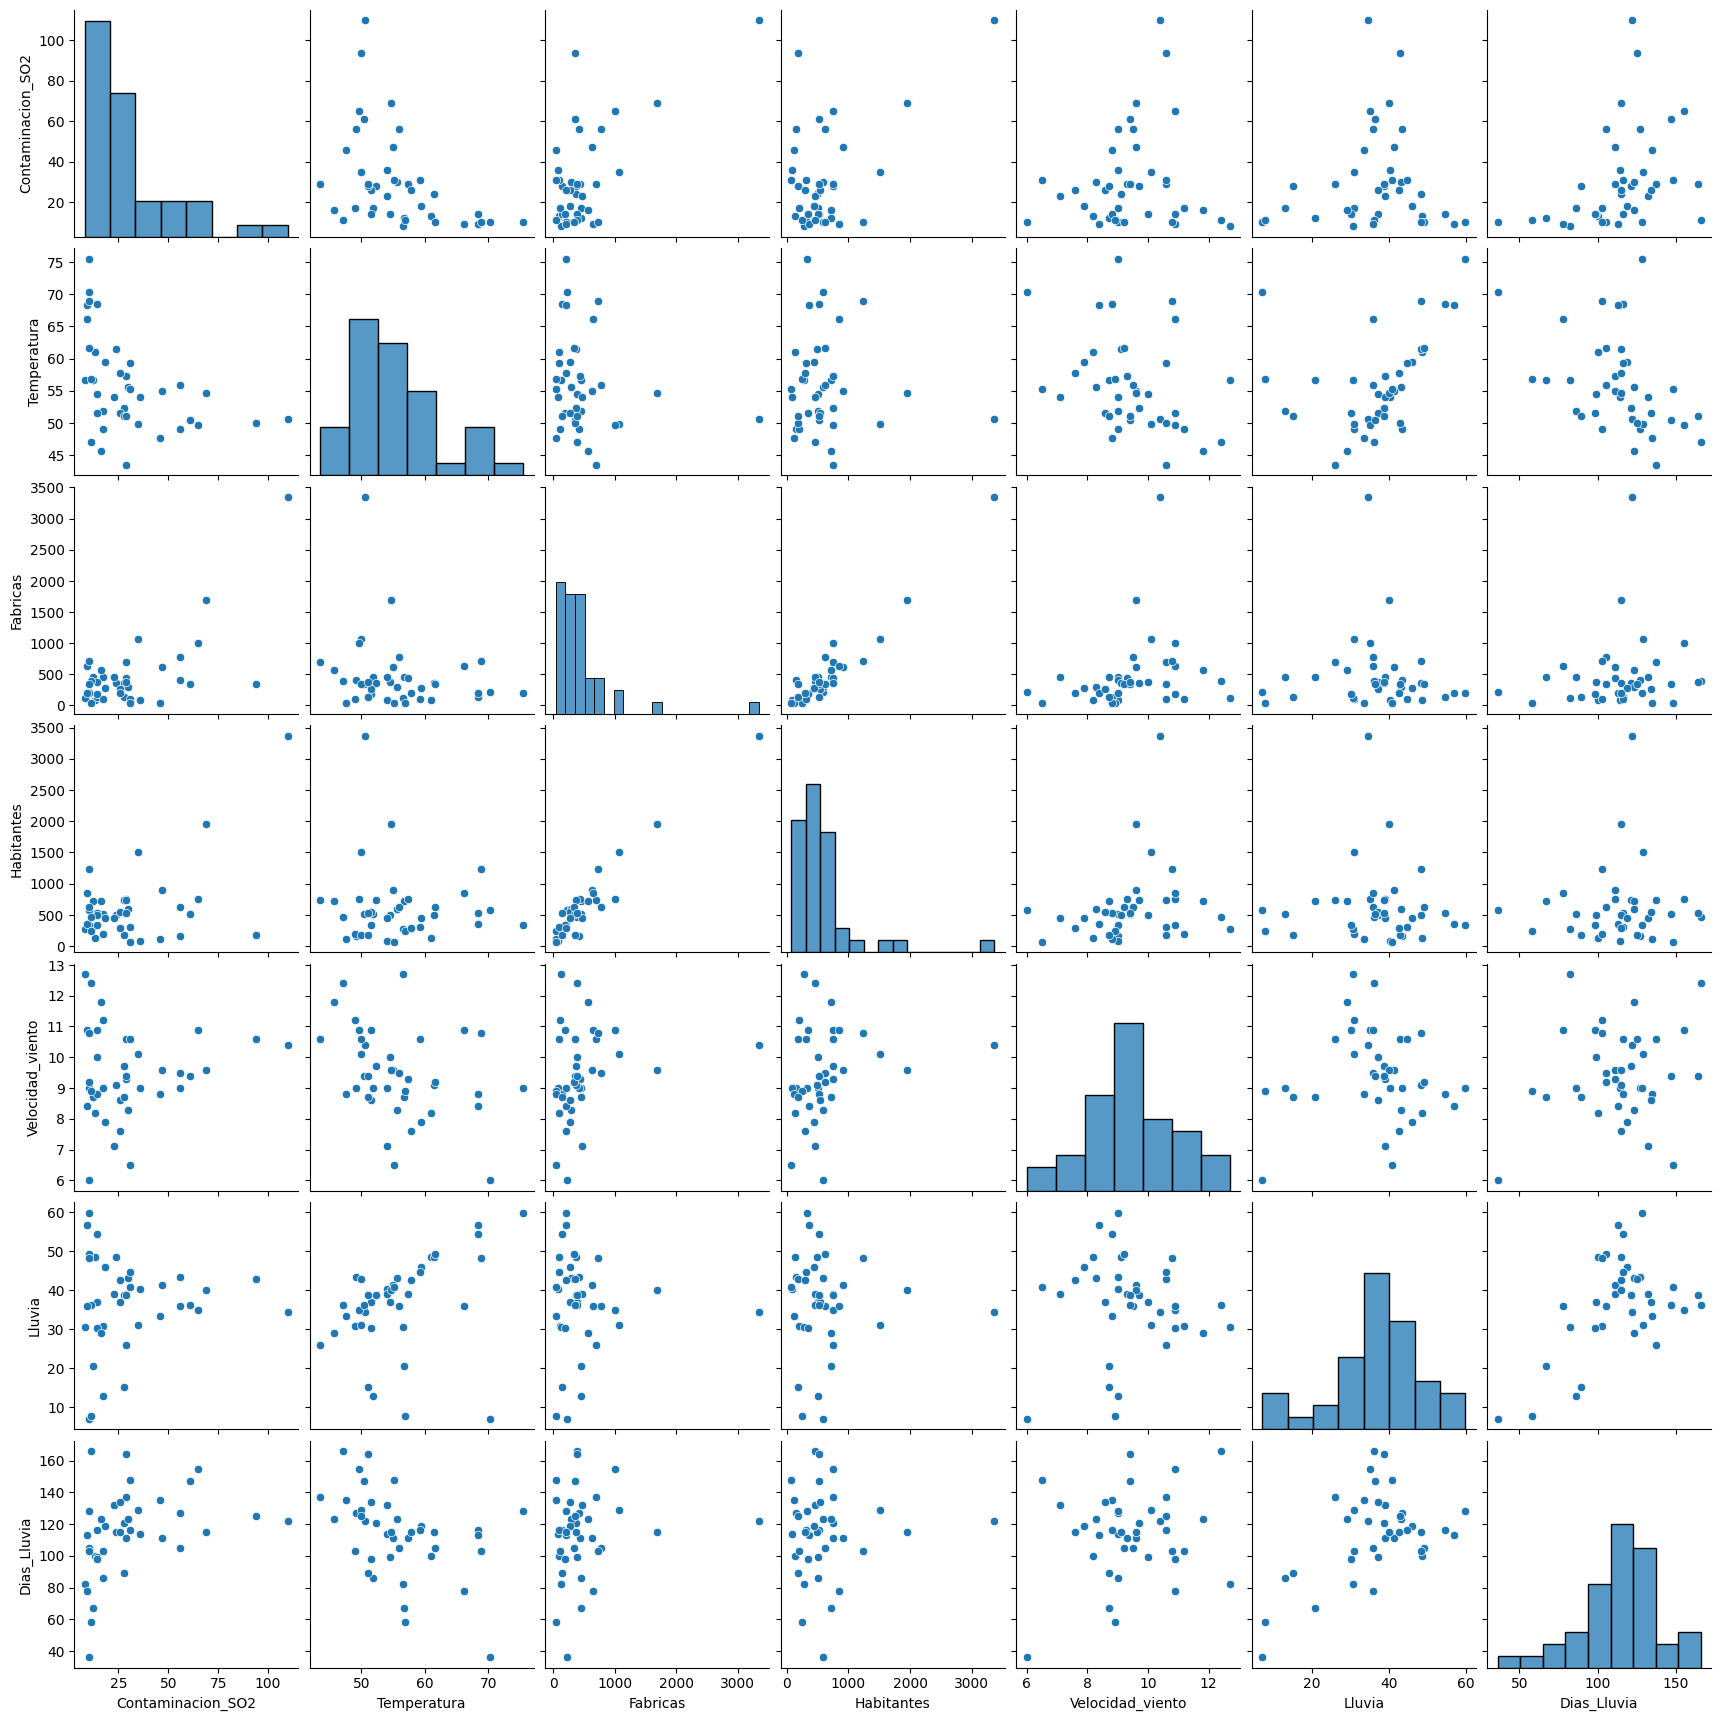

In [11]:
sns.pairplot(cont)
plt.show()

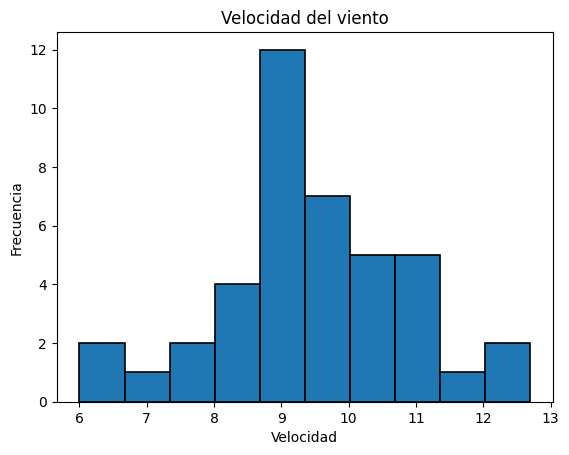

In [12]:
plt.hist(cont['Velocidad_viento'], edgecolor='black', linewidth=1.2)
plt.title('Velocidad del viento')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.show()

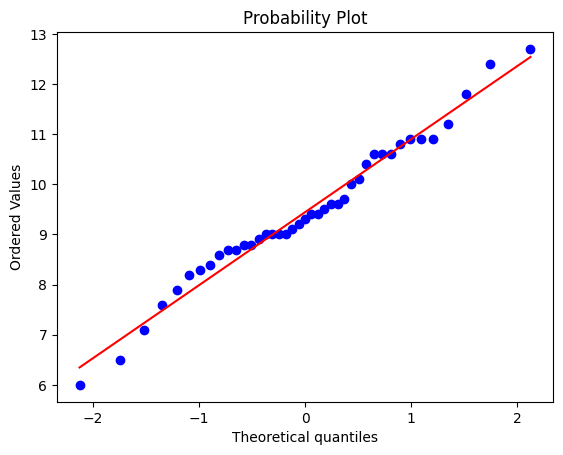

In [13]:
import pylab
import scipy.stats as stats

stats.probplot(cont['Velocidad_viento'], dist="norm", plot=pylab)
pylab.show()

In [14]:
from scipy.stats import shapiro

stat, p = shapiro(cont['Velocidad_viento'])
print('Estadístico=%.3f, p=%.3f' % (stat, p))

Estadístico=0.981, p=0.697


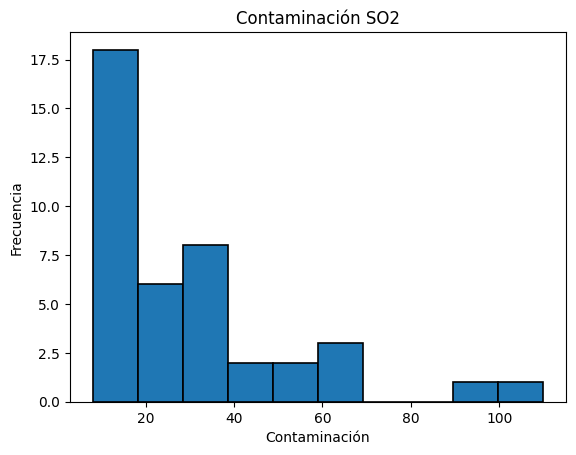

In [15]:
plt.hist(cont['Contaminacion_SO2'], edgecolor='black', linewidth=1.2)
plt.title('Contaminación SO2')
plt.xlabel('Contaminación')
plt.ylabel('Frecuencia')
plt.show()

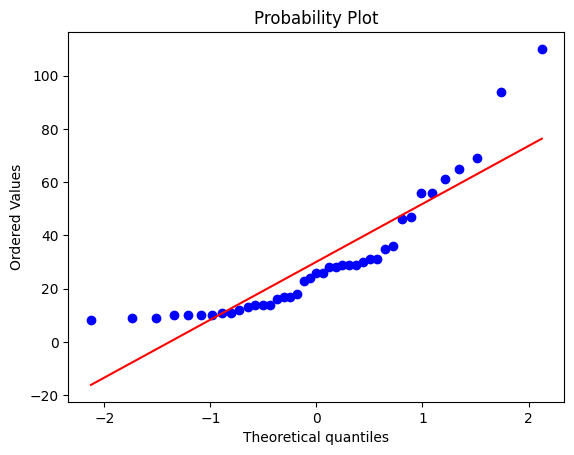

In [16]:
stats.probplot(cont['Contaminacion_SO2'], dist="norm", plot=pylab)
pylab.show()

In [17]:
stat, p = shapiro(cont['Contaminacion_SO2'])
print('Estadístico=%.3f, p=%.3f' % (stat, p))

Estadístico=0.812, p=0.000


In [18]:
cont_corr = cont.corr()
cont_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
Temperatura,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
Fabricas,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
Habitantes,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
Velocidad_viento,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
Lluvia,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
Dias_Lluvia,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


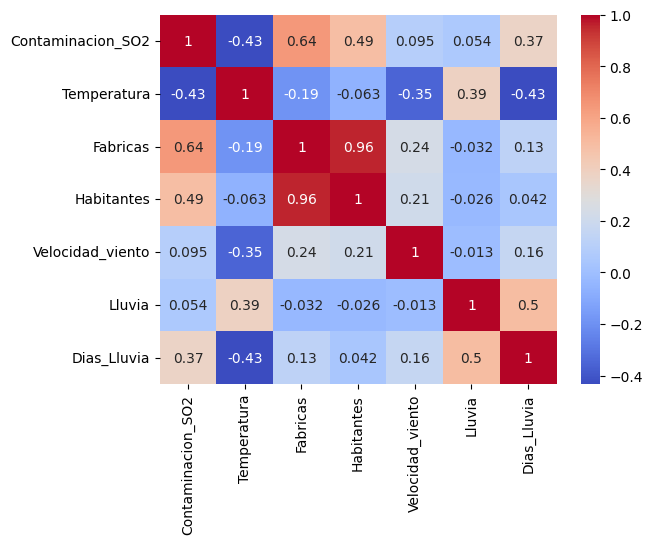

In [19]:
sns.heatmap(cont_corr, annot=True, cmap='coolwarm', xticklabels=cont_corr.columns, yticklabels=cont_corr.columns)
plt.show()

In [20]:
import pingouin as pg

In [21]:
# Revisar significancia estadística
corr = pg.pairwise_corr(cont, method='spearman')
# Ordenar los valores de acuerdo con 'p-unc' (significancia)
corr.sort_values(by=['p-unc'], ascending=True)[['X', 'Y', 'r', 'p-unc']]
# p-unc > 0.05 => no hay correlación significativa, posiblemente la correlacion se debe al azar

,X,Y,r,p-unc
11,Fabricas,Habitantes,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,-0.505730,7.434618e-04
9,Temperatura,Lluvia,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,-0.256605,1.053381e-01


Ejemplos ads y currency

In [22]:
# registrar el convertidor datetime para la gráficas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [23]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
cur = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])
ads.head()

C:\Users\cemh0\AppData\Local\Temp\ipykernel_26256\3918855165.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cur = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])


,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [24]:
cur.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


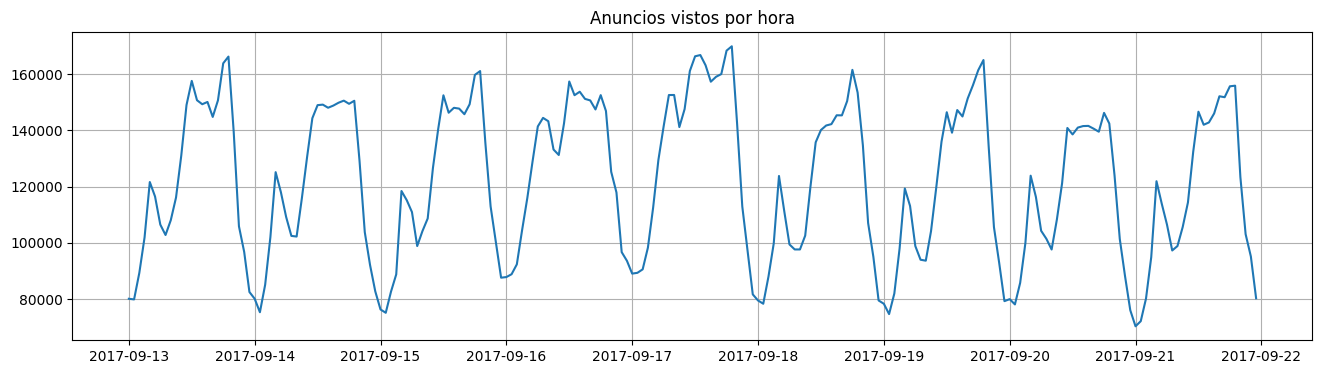

In [25]:
plt.figure(figsize=(16, 4))
plt.plot(ads.Ads)
plt.title('Anuncios vistos por hora')
plt.grid()
plt.show()

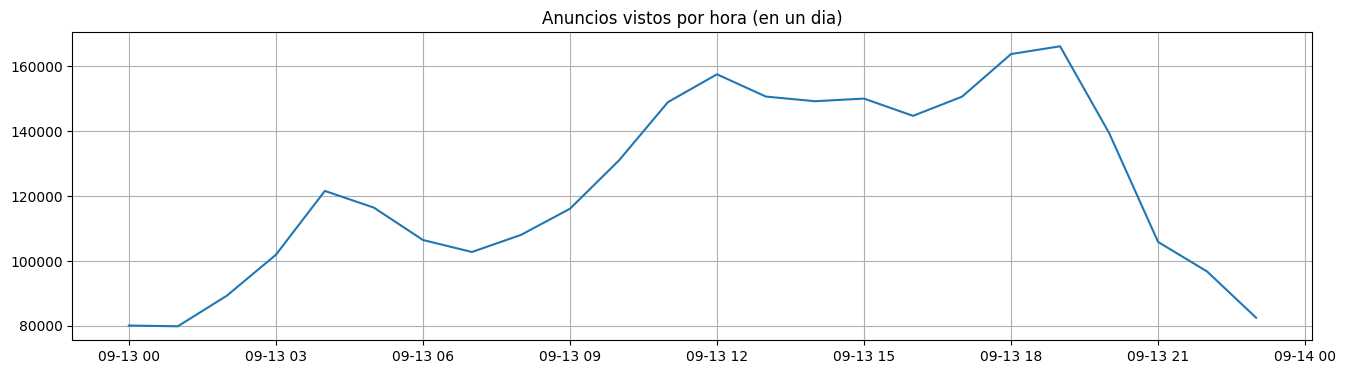

In [26]:
plt.figure(figsize=(16, 4))
plt.plot(ads.Ads.head(24))
plt.title('Anuncios vistos por hora (en un dia)')
plt.grid()
plt.show()

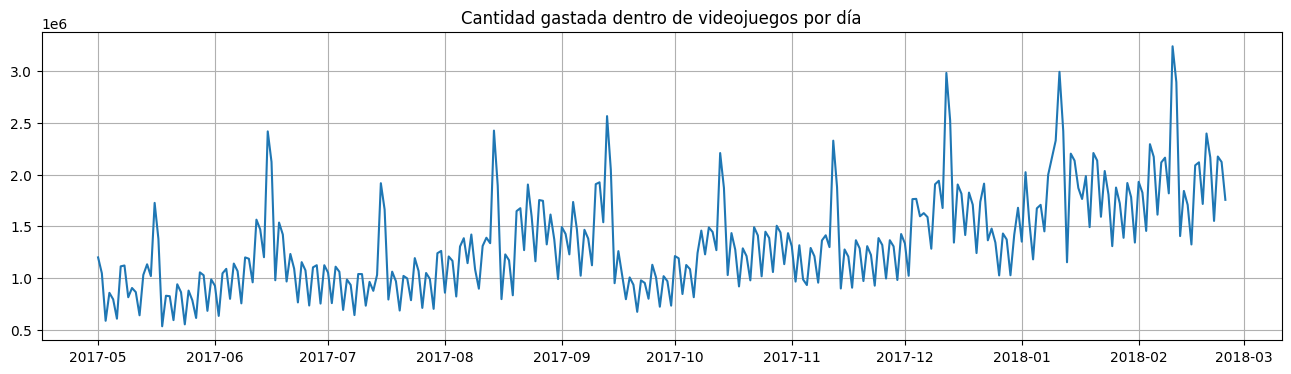

In [27]:
plt.figure(figsize=(16, 4))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.grid()
plt.title('Cantidad gastada dentro de videojuegos por día')
plt.show()

AutoCorrelation function

In [28]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import scipy.stats as scs

In [29]:
data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


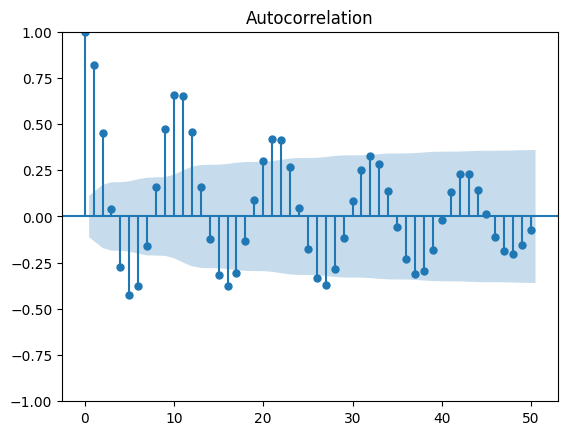

In [30]:
sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values, lags=50)
plt.show()

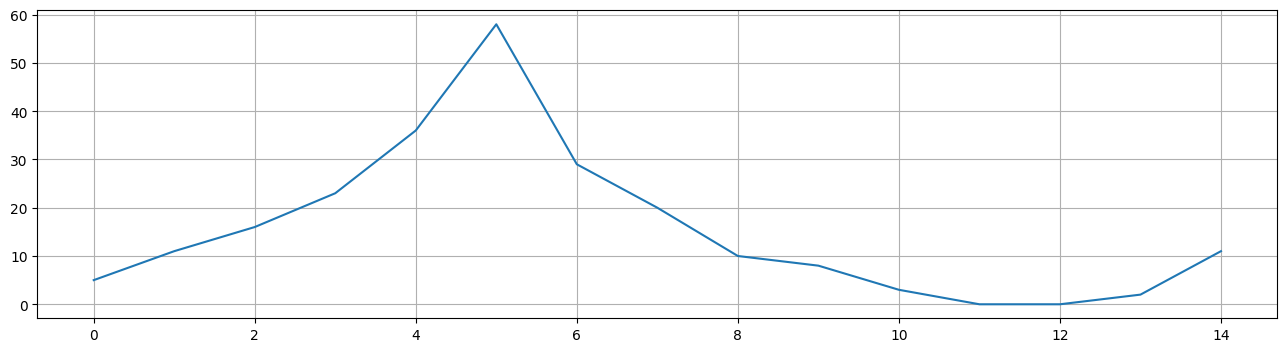

In [31]:
plt.figure(figsize=(16, 4))
data.SUNACTIVITY.head(15).plot()
plt.grid()
plt.show()

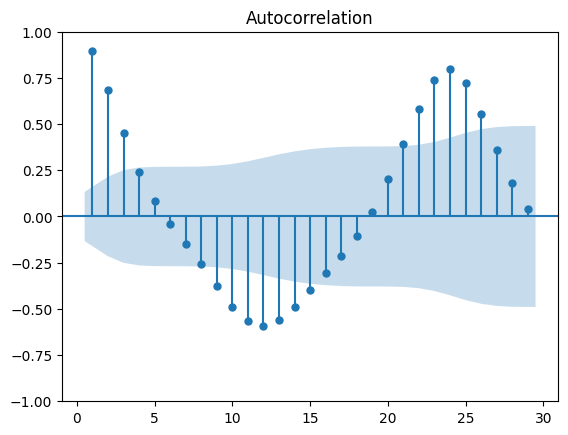

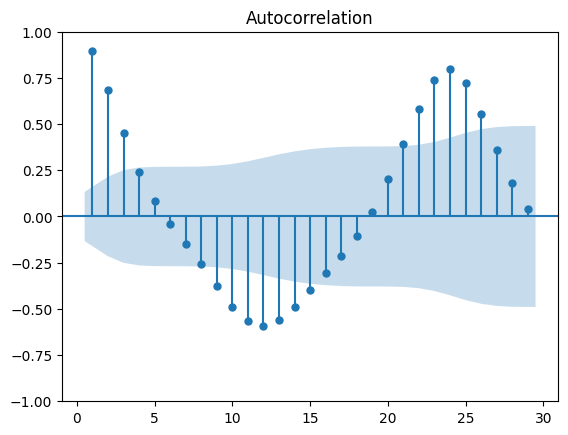

In [32]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ads.Ads, lags=range(1,30))

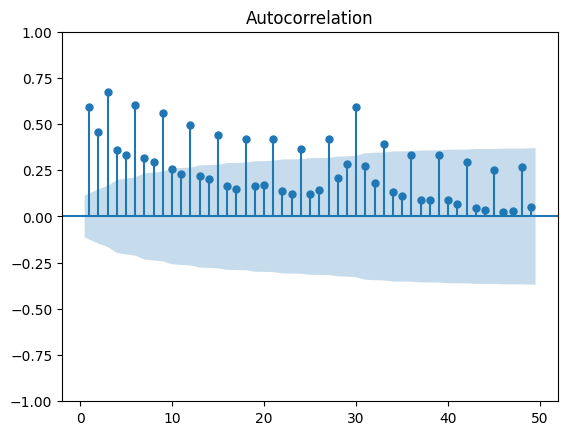

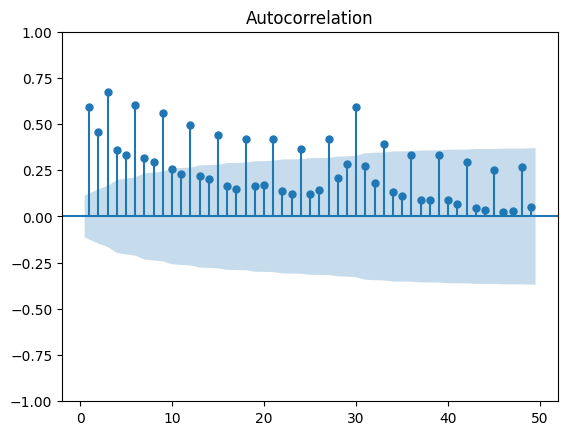

In [33]:
plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,50))

In [34]:
import numpy as np

In [35]:
# Media movil
def moving_average(series, n):
    """n es el tamano de la ventana"""
    return np.average(series[-n:])

In [36]:
moving_average(ads.Ads, 24)

np.float64(116805.0)

In [37]:
moving_average(cur.GEMS_GEMS_SPENT, 30)

np.float64(1931348.8)

In [64]:
# Metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, scale=1.96, plot_intervals=False, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(16, 4))
    plt.title('Media movil\nTamano de la ventana = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Tendencia de media movil')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Intervalo de confianza')
        plt.plot(lower_bound, 'r--')

        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bound] = series[series < lower_bound]
            anomalies[series > upper_bound] = series[series > upper_bound]
            plt.plot(anomalies, 'ro', markersize=10)
    plt.plot(series[window:], 'b', label='Valores reales')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    
    mape = mean_absolute_percentage_error(series[window:], rolling_mean[window:])
    print('MAE =', mae)
    print('MAPE =', mape)

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


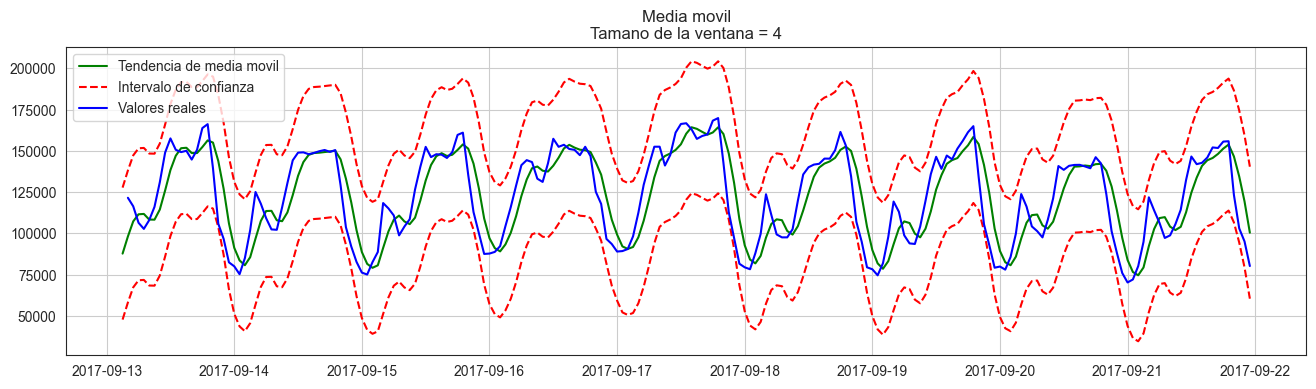

MAE = 11397.688679245282
MAPE = 10.240672665016465


In [65]:
plot_moving_average(ads, 4, plot_intervals=True, plot_anomalies=True)

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


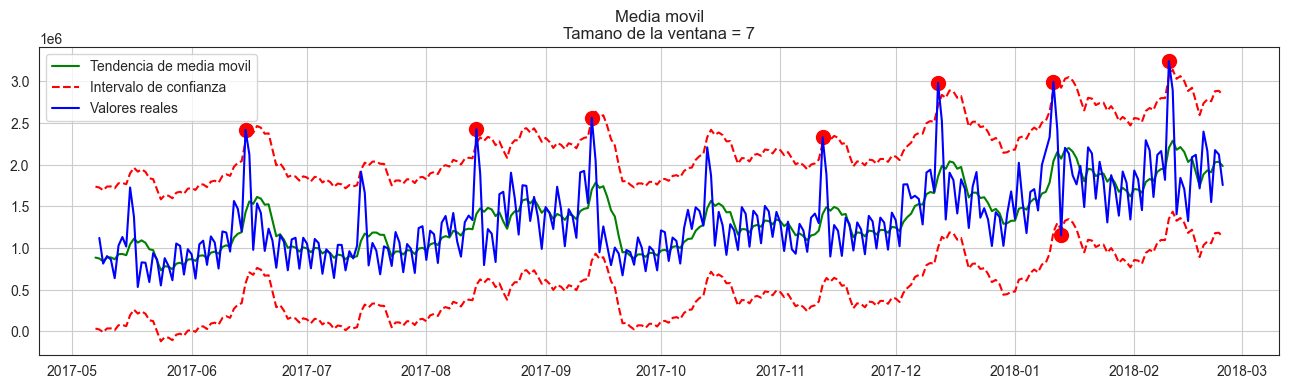

MAE = 236578.0672842516
MAPE = 18.400935365270296


In [66]:
plot_moving_average(cur, 7, plot_intervals=True, plot_anomalies=True)

### **Tarea:**

Verificar que $\hat{\mu}_n = (1-\alpha) \hat{\mu}_{n-1} + \alpha y_n$ se obtiene a partir de $\hat{\mu}_n=\sum_{t=1}^n w_t y_t$

Por definición se sabe que $w_t = \alpha(1-\alpha)^{n-t}, \, t\in\{1,\cdots, n\}$

$$\hat{\mu_n} = \sum_{t=1}^{n} \alpha (1-\alpha)^{n-t} y_t$$

$$=\sum_{t=1}^{n-1} \alpha (1-\alpha)^{n-t} y_t + \alpha y_n$$

$$= (1-\alpha) \sum_{t=1}^{n-1} \alpha (1-\alpha)^{n-1-t} y_t + \alpha y_n$$

$$(1-\alpha) \hat{\mu}_{n-1} + \alpha y_n$$

Media con pesos

In [67]:
def media_con_pesos(series, weights):
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return result

In [68]:
ads.tail(3)

,Ads
Time,
2017-09-21 21:00:00,103080
2017-09-21 22:00:00,95155
2017-09-21 23:00:00,80285


In [69]:
media_con_pesos(ads, [0.6, 0.3, 0.1])

Ads    87025.5
Name: 2017-09-21 23:00:00, dtype: float64

Suavizado exponencial

In [70]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [71]:
def plot_exponential_smoothing(series, alphas):
    sns.set_style('white')
    plt.figure(figsize=(12, 6))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series.values, alpha), label='Alpha: {}'.format(alpha))
    plt.plot(series.values, label='Valores reales')
    plt.legend(loc='best')
    plt.title('Exponential Smoothing')
    plt.grid(True)
    plt.show()

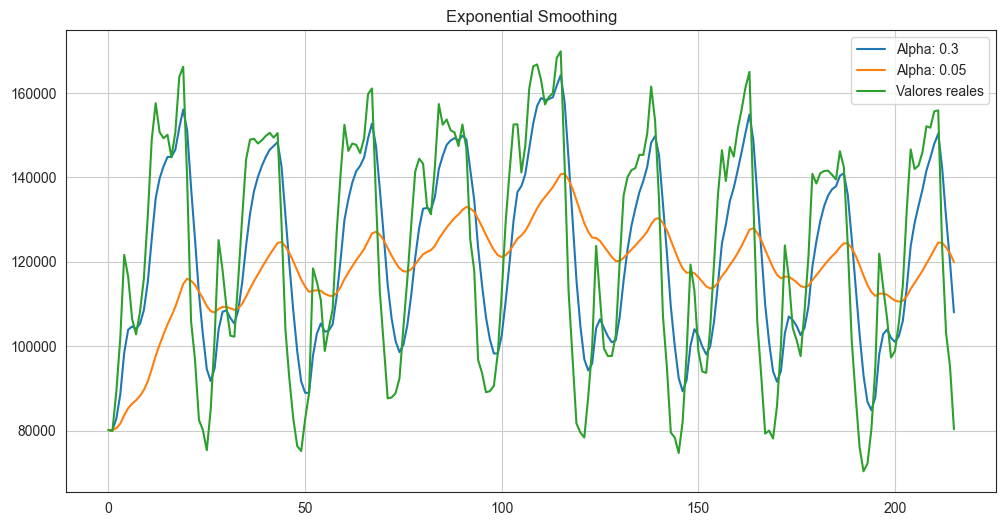

In [72]:
plot_exponential_smoothing(ads.Ads, [0.3, 0.05])

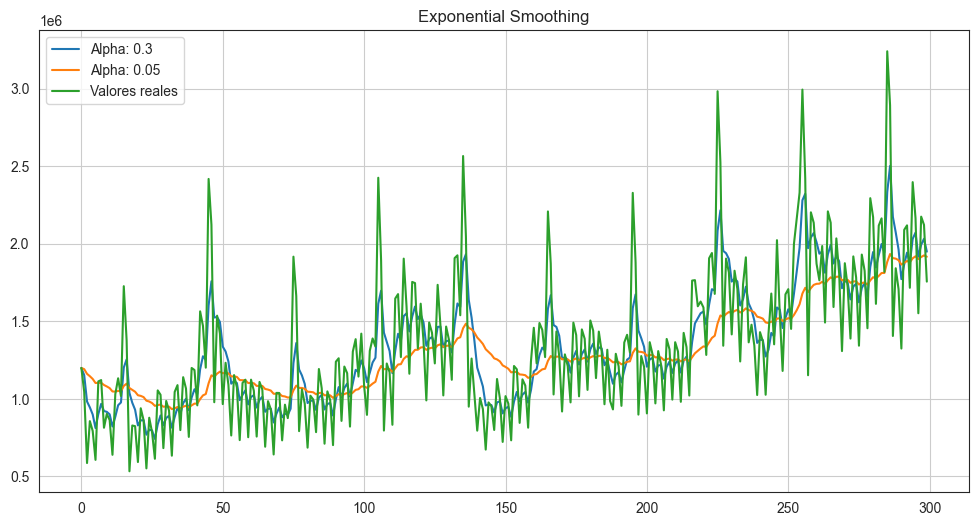

In [73]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, [0.3, 0.05])

In [74]:
from statsmodels.tsa.api import SimpleExpSmoothing
def plot_simple_exponential_smoothing(series, alpha):
    ses1 = SimpleExpSmoothing(series).fit(smoothing_level=alpha, optimized=False)
    # Pronostico
    ses2 = ses1.forecast(len(series)/2)
    series.plot(kind='line', figsize=(12, 6))
    ses2.plot(kind='line')
    plt.show()

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


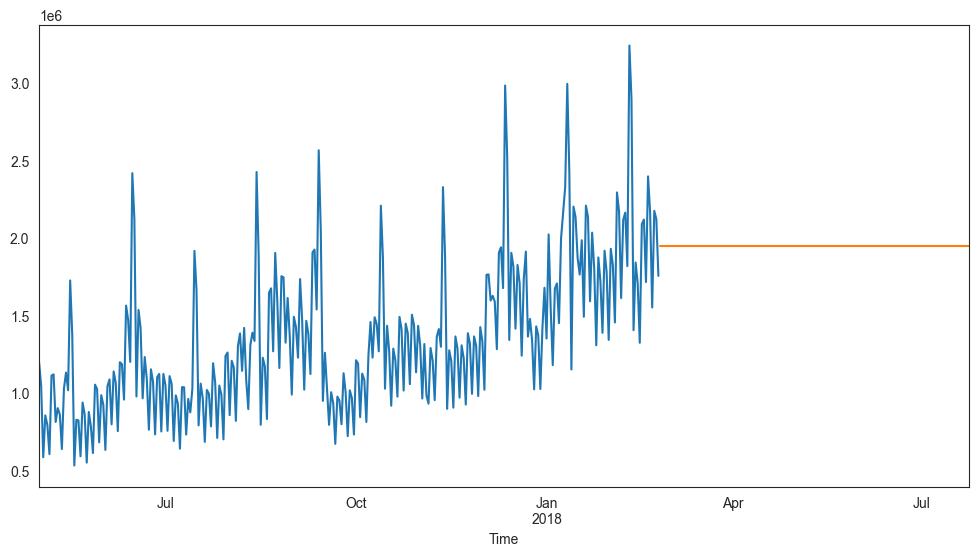

In [75]:
plot_simple_exponential_smoothing(cur.GEMS_GEMS_SPENT, 0.3)

Holt-Winters

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing
def plot_exponential_smoothing(series, alpha):
    ses1 = ExponentialSmoothing(series, trend='add', seasonal_periods=12, seasonal='add').fit()
    # Pronostico
    ses2 = ses1.forecast(len(series)/2)
    series.plot(kind='line', figsize=(12, 6))
    ses2.plot(kind='line')
    plt.show()

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


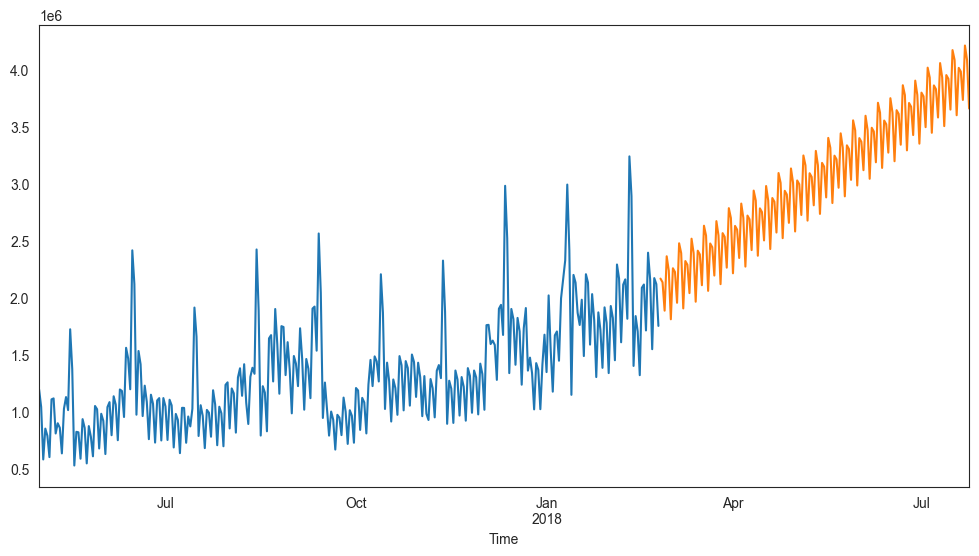

In [77]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, 0.3)

In [78]:
def plot_hw(series, n=20):
    hw = ExponentialSmoothing(series, seasonal_periods=12).fit()
    train, test = series[:-n], series[-n:]
    hw_p = hw.predict(start=test.index[0], end=test.index[-1])
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(hw_p.index, hw_p, label='Holt-Winters')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


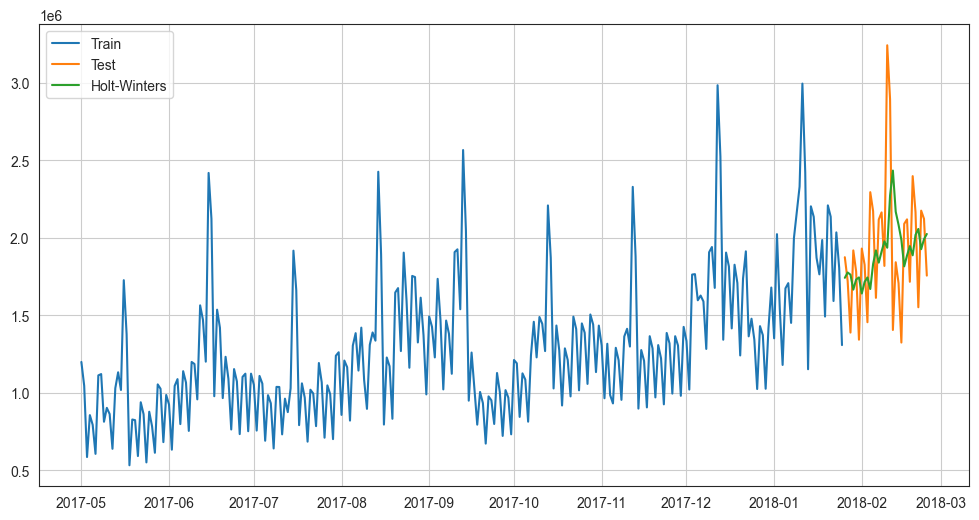

In [79]:
plot_hw(cur.GEMS_GEMS_SPENT, 30)

Prevision basada en regresion

In [80]:
data = pd.DataFrame(ads.Ads.copy())
data.columns = ['y']
data

,y
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


Generar los retrasos de la variable objetivo

In [81]:
for i in range(6,25):
    data[f'lag_{i}'] = data.y.shift(i)
data.head(10)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 05:00:00,116475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,106495,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 07:00:00,102795,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 08:00:00,108055,89325.0,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [83]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, X_test, y_train, y_test

In [84]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134, 19), (58, 19), (134,), (58,))

Regresion lineal

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
def plot_lr_ts(model, X_train, X_test, y_train, y_test, scale = 1.96, plot_intervals=False, plot_anomalies=False):
    prediction = model.predict(X_test)
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, 'g', label='Predicción', linewidth=2.0)
    plt.plot(y_test.values, label='Valores reales', linewidth=2.0)
    plt.legend(loc='best')
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
        mae = cv.mean() * (-1)
        deviation = cv.std()
        lower_bound = prediction - (mae + scale * deviation)
        upper_bound = prediction + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Intervalo de confianza')
        plt.plot(lower_bound, 'r--')
        if plot_anomalies:
            anomalies = np.array([np.nan]*len(y_test))
            anomalies[y_test < lower_bound] = y_test[y_test < lower_bound]
            anomalies[y_test > upper_bound] = y_test[y_test > upper_bound]
            plt.plot(anomalies, 'ro', markersize=10)
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title(f'Error absoulto medio = {error:.3f}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_coefs(model):
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ['coef']
    coefs['abs'] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by='abs', ascending=False).drop('abs', axis=1)
    plt.figure(figsize=(10, 6))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')

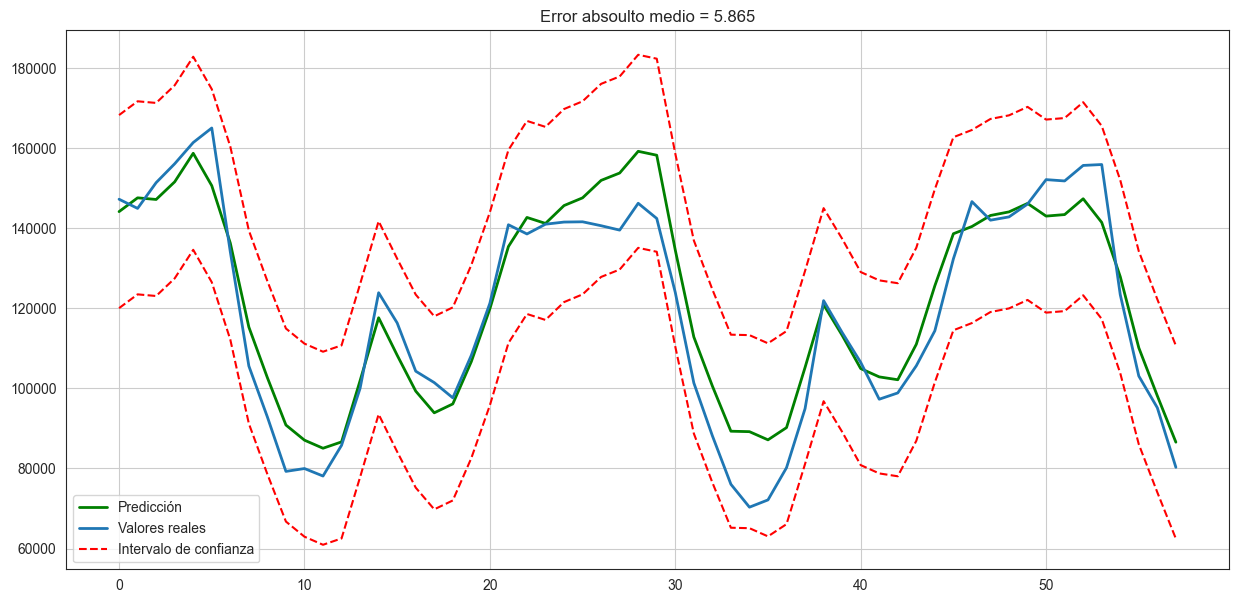

In [94]:
plot_lr_ts(lr, X_train, X_test, y_train, y_test, plot_intervals=True, plot_anomalies=True)

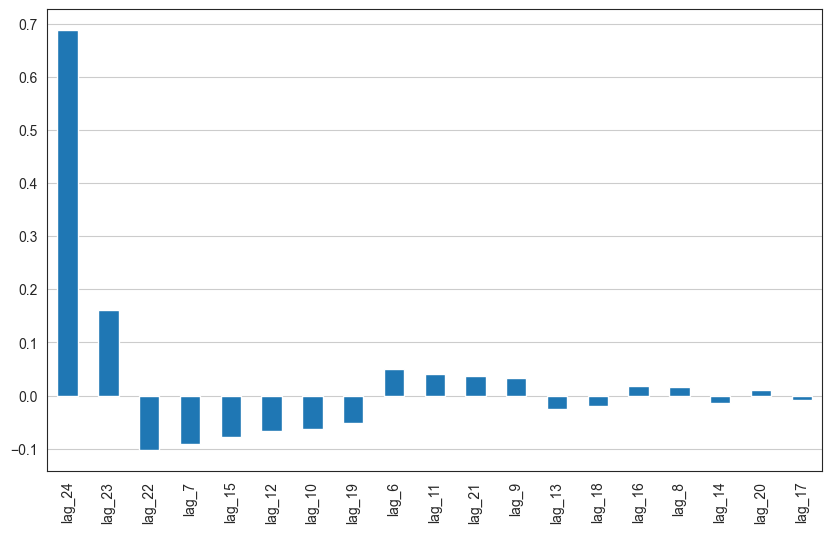

In [89]:
plot_coefs(lr)